In [1]:
# Import required modules.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, recall_score, precision_score, accuracy_score

In [2]:
# Get the data.
data_set = datasets.load_breast_cancer()

In [3]:
def precision_recall(data_set):
    # Read the data into an array form.
    x = data_set.data     # feature x.
    y = data_set.target   # target variable y.
  
    # Read the names of the features.
    feature_list = data_set.feature_names
  
    # Convert the data into a data frame.
    data_frame = pd.DataFrame(x, columns = feature_list)
  
    # To insert an output column in data_frame.
    data_frame.insert((len(x[0])), 'output', y)      
  
    # Train Test Split.
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
  
    # Create Classifier Object.
    clf = SVC()
    clf.fit(x_train, y_train)
  
    # Use decision_function method.
    decision_function = clf.decision_function(x_test)
    print(decision_function)

    # Actual obtained results without any manual setting of Decision Threshold.
    predict_actual = clf.predict(x_test)       # Predict using classifier.
    accuracy_actual = clf.score(x_test, y_test)
    classification_report_actual = classification_report(y_test, predict_actual)
    print(predict_actual, accuracy_actual, classification_report_actual, sep ='\n')

    # Plot Precision-Recall curve using sklearn.
    from sklearn.metrics import precision_recall_curve
    precision, recall, threshold = precision_recall_curve(y_test, decision_function)
    return data_frame,precision,recall,threshold

In [4]:
data_frame,precision,recall,threshold = precision_recall(data_set)

[ 0.8976884  -2.75199014 -1.26050508  1.53710971  1.59976125 -2.53621802
 -2.04353503 -1.40775105  1.24589218  0.89420924  1.19050321 -1.63080211
  0.68837134 -0.23233281  1.36425546 -1.54874514  0.79342176  1.67715251
  1.48623464 -2.45491776  0.39730515  1.33258439 -2.26985192  1.59922552
  1.5631612   1.3508229   1.24729373  1.67095866  1.34935275 -2.87084175
  1.60378204  1.44584565  1.53768789  0.59146438  1.6172028   1.45268697
 -1.18366547  1.39072004 -2.59757296  0.53461528  1.60141981 -0.75250193
  1.55573443  1.34930089  1.61131808  1.38347829  1.5872994   1.6005464
  1.30749313  1.32022265 -2.27665163 -2.65584519  1.14969309  1.18745271
  1.49170612  0.95058087  1.60743492 -1.34426643  0.7238304   1.5730383
  1.19016526 -2.53328703 -2.18520251  0.86836758  1.42729093  1.16098675
 -1.78823985 -2.35100038  1.55175432  1.14864878  0.41058649 -1.90602282
  1.0716773  -0.25456476  1.50216344  1.09548468  0.90834203  0.34586538
  1.54420189  1.50682432 -1.29941273  1.46151938  0.4

Text(0.5, 1.0, 'Precision-Recall Curve')

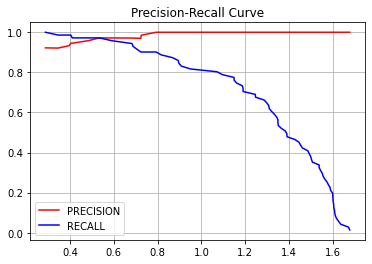

In [5]:
# Plot the output.
plt.plot(threshold, precision[:-1], c ='r', label ='PRECISION')
plt.plot(threshold, recall[:-1], c ='b', label ='RECALL')
plt.grid()
plt.legend()
plt.title('Precision-Recall Curve')